In [1]:
import time
import cv2
import numpy as np
import tensorflow as tf

from yolov3_tf2.models import YoloV3
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs
from absl import app, logging, flags
from absl.flags import FLAGS

from keras_preprocessing import image
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [2]:
flags.DEFINE_string('classes', 'C:/Users/bitcamp/yolov3-tf2/data/coco.names', 'classes file')
flags.DEFINE_string('weights', 'C:/Users/bitcamp/yolov3-tf2/checkpoints/yolov3.tf', 'weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', 'C:/Users/bitcamp/yolov3-tf2/data/girl.png', 'imput image')
flags.DEFINE_string('tfrecord', None, 'tfrecord')
flags.DEFINE_string('output', './output.jpg', 'output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes')

app._run_init(['yolov3'], app.parse_flags_with_usage)

# C:\Users\bitcamp\yolov3-tf2\data

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
yolo = YoloV3(classes=FLAGS.num_classes)
yolo.load_weights(FLAGS.weights).expect_partial()
class_names = [c.strip() for c in open(FLAGS.classes).readlines()]

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


W0223 18:11:09.453786  3260 deprecation.py:534] From C:\Users\bitcamp\.conda\envs\yolov3-tf2-gpu\lib\site-packages\tensorflow\python\ops\array_ops.py:5049: calling gather (from tensorflow.python.ops.array_ops) with validate_indices is deprecated and will be removed in a future version.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [4]:
print(class_names)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
def detector():
    img_raw = tf.image.decode_image(open(FLAGS.image, 'rb').read(), channels=3)
    
    img = tf.expand_dims(img_raw, 0)
    img = transform_images(img, FLAGS.size)
    
    t1 = time.time()
    boxes, scores, classes, nums = yolo(img)
    t2 = time.time()
    print('time : {}'.format(t2 - t1))
    
    for i in range(nums[0]):
        print('{}, {}, {}'.format(class_names[int(classes[0][i])],
                                  np.array(scores[0][i]),
                                  np.array(boxes[0][i])))
        
        img = cv2.cvtColor(img_raw.numpy(), cv2.COLOR_RGB2BGR)
        img = draw_outputs(img, (boxes, scores, classes, nums), class_names)
        
        return img

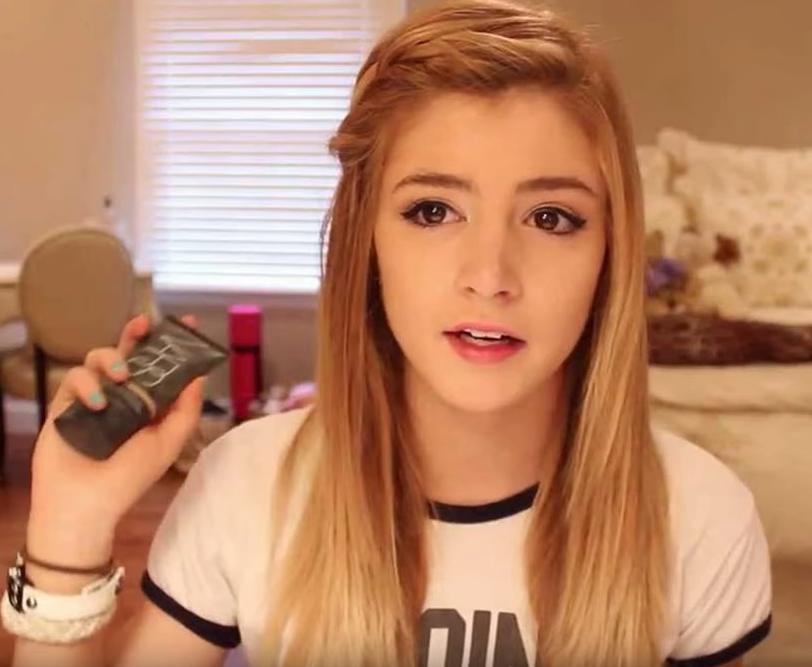

In [6]:
FLAGS.image = 'C:/Users/bitcamp/yolov3-tf2/data/girl.png'
Image(filename=FLAGS.image, width=500)

time : 6.774137020111084
person, 0.9997697472572327, [0.06754464 0.03718692 0.9679881  0.9650753 ]


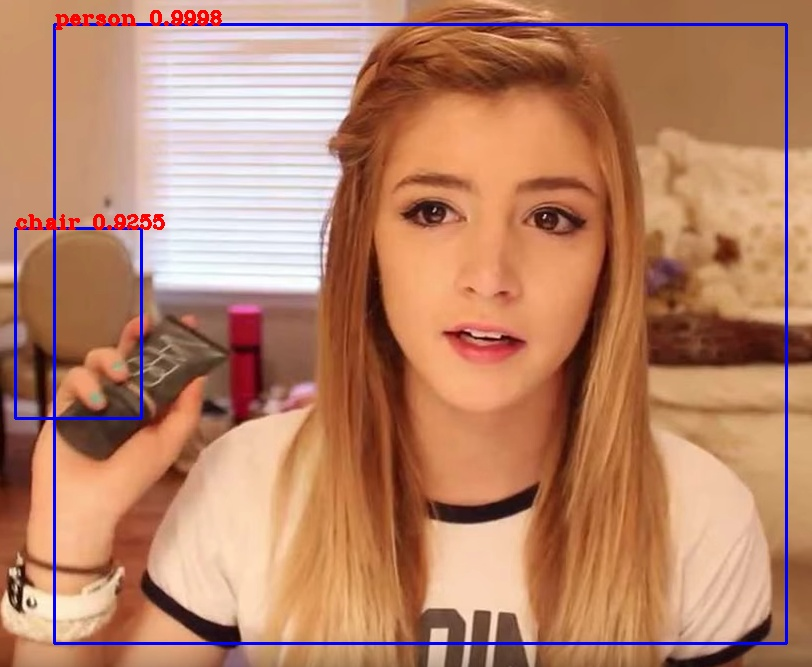

In [7]:
output = detector()
display(Image(data=bytes(cv2.imencode('.jpg', output)[1]), width=500))

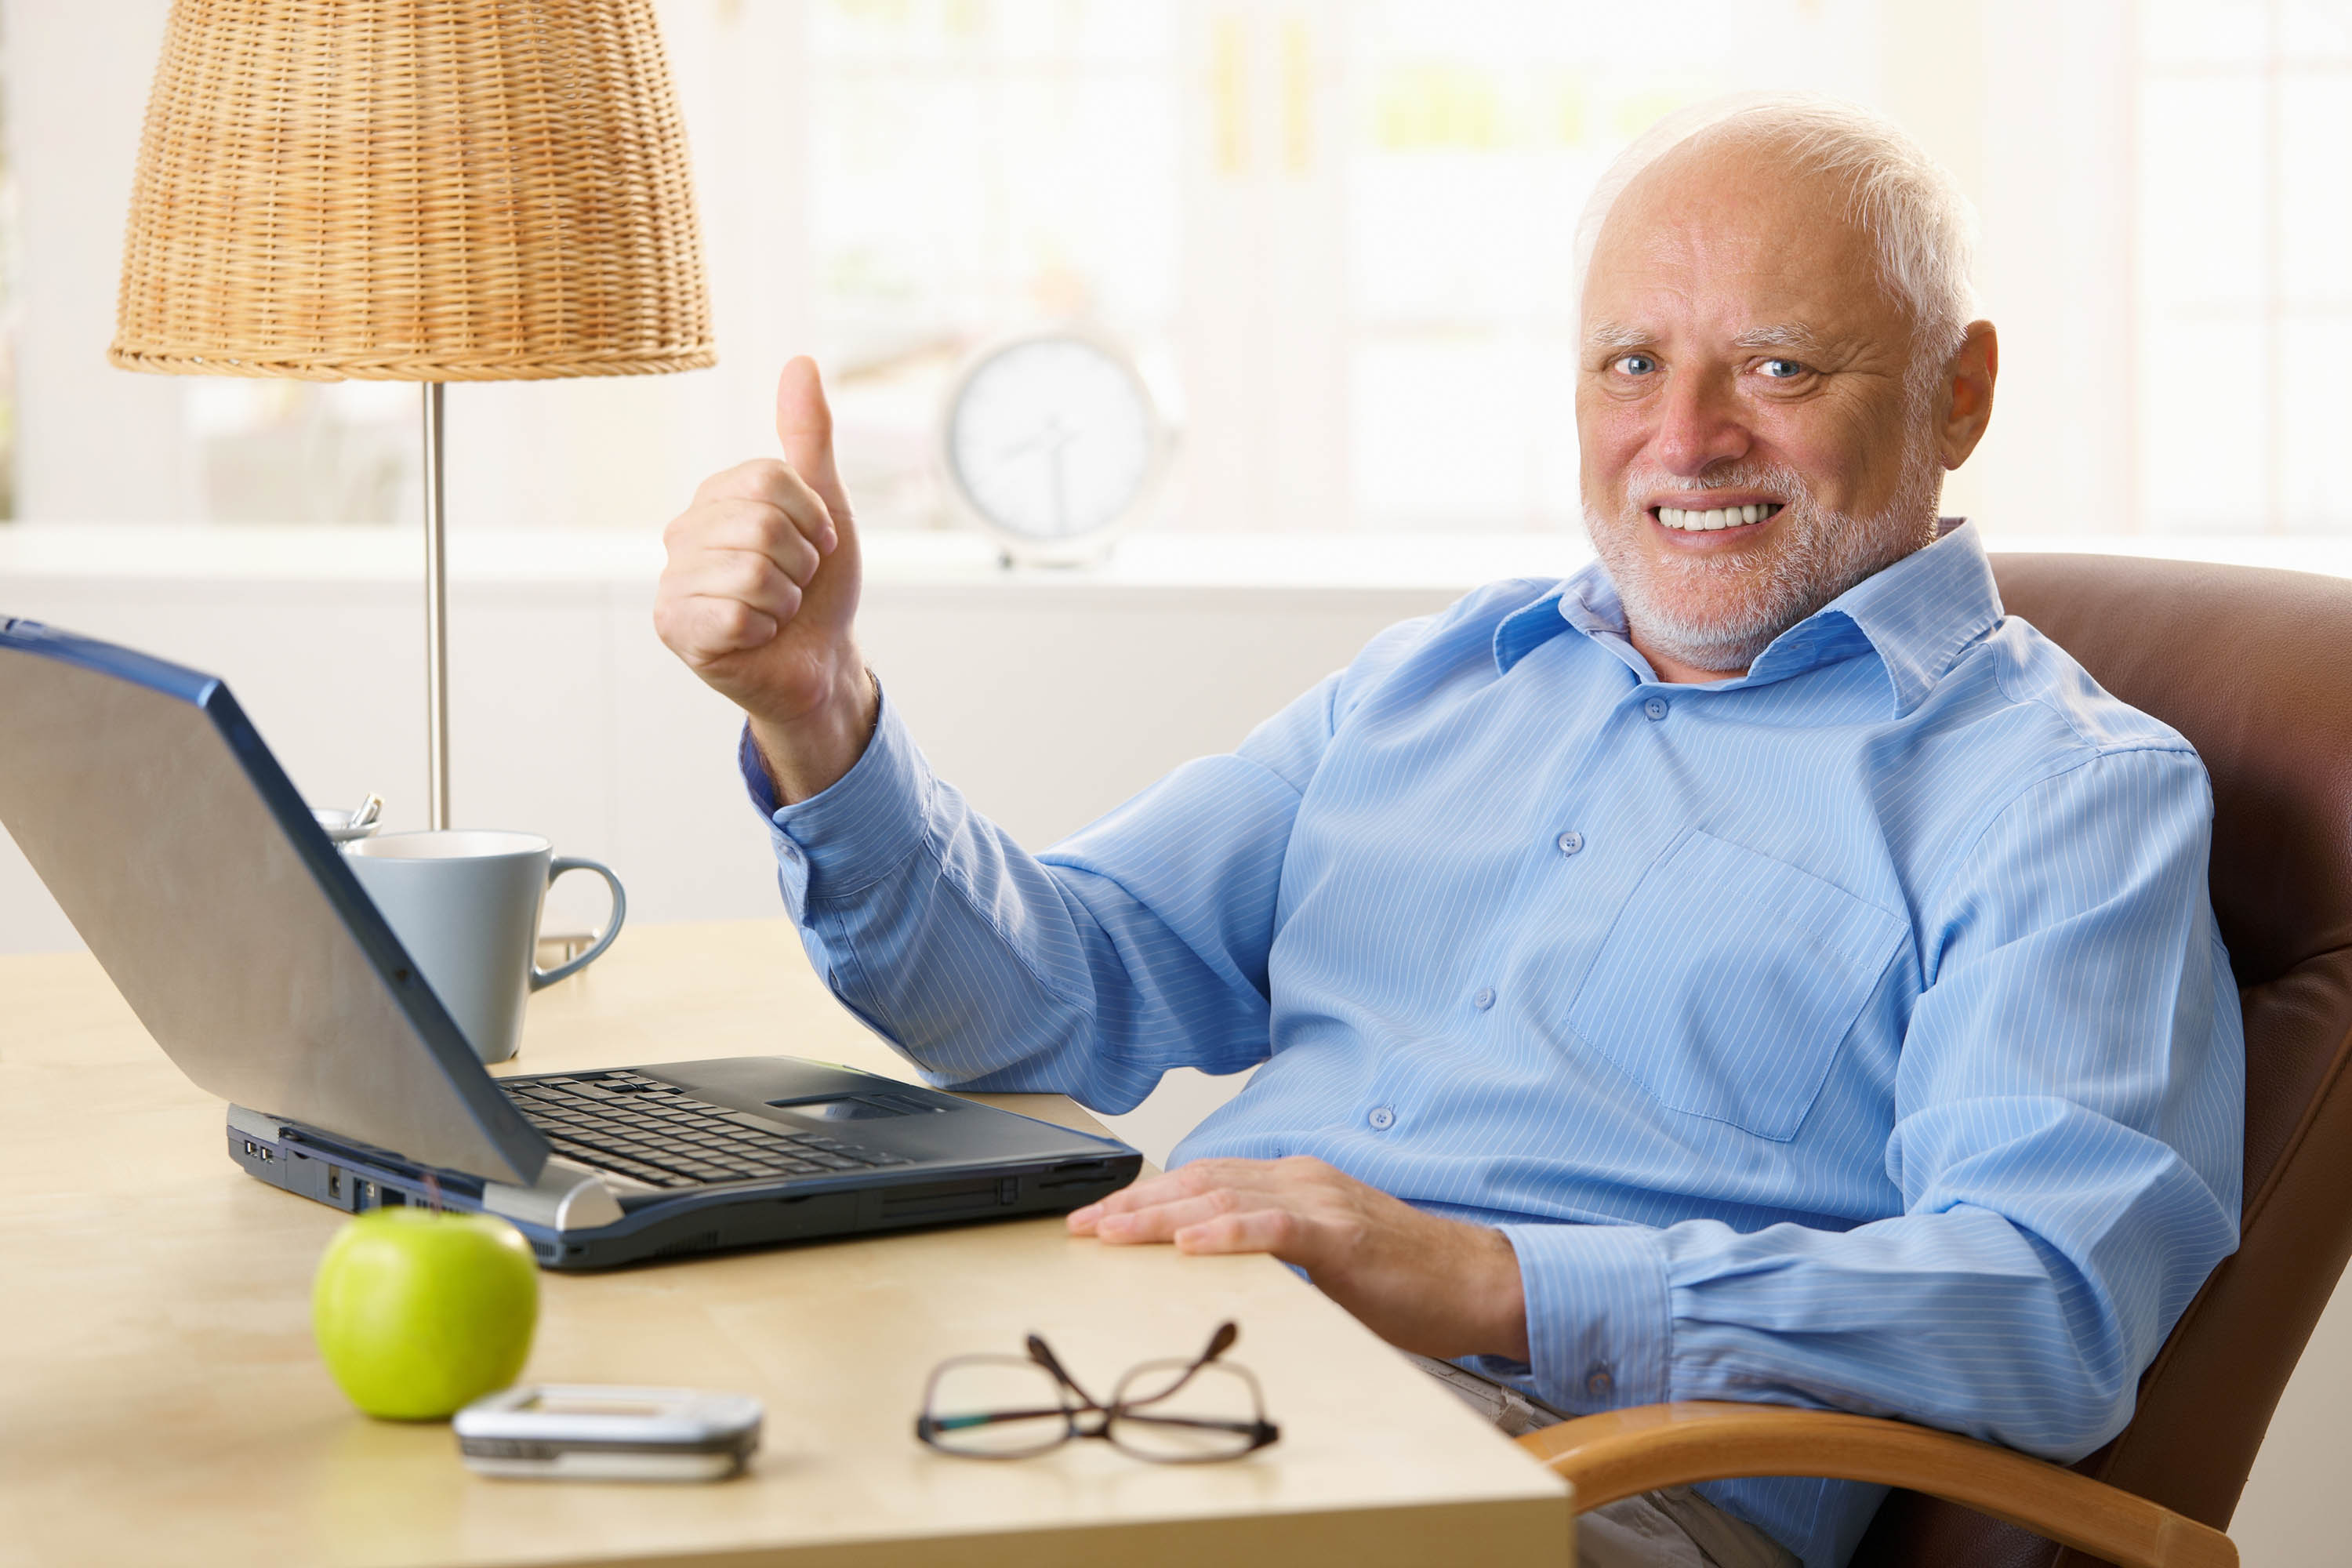

In [8]:
FLAGS.image = 'C:/Users/bitcamp/yolov3-tf2/data/meme.jpg'
Image(filename=FLAGS.image, width=300)

time : 0.28499913215637207
cup, 0.9980731010437012, [0.14266218 0.52777606 0.27184254 0.65748256]


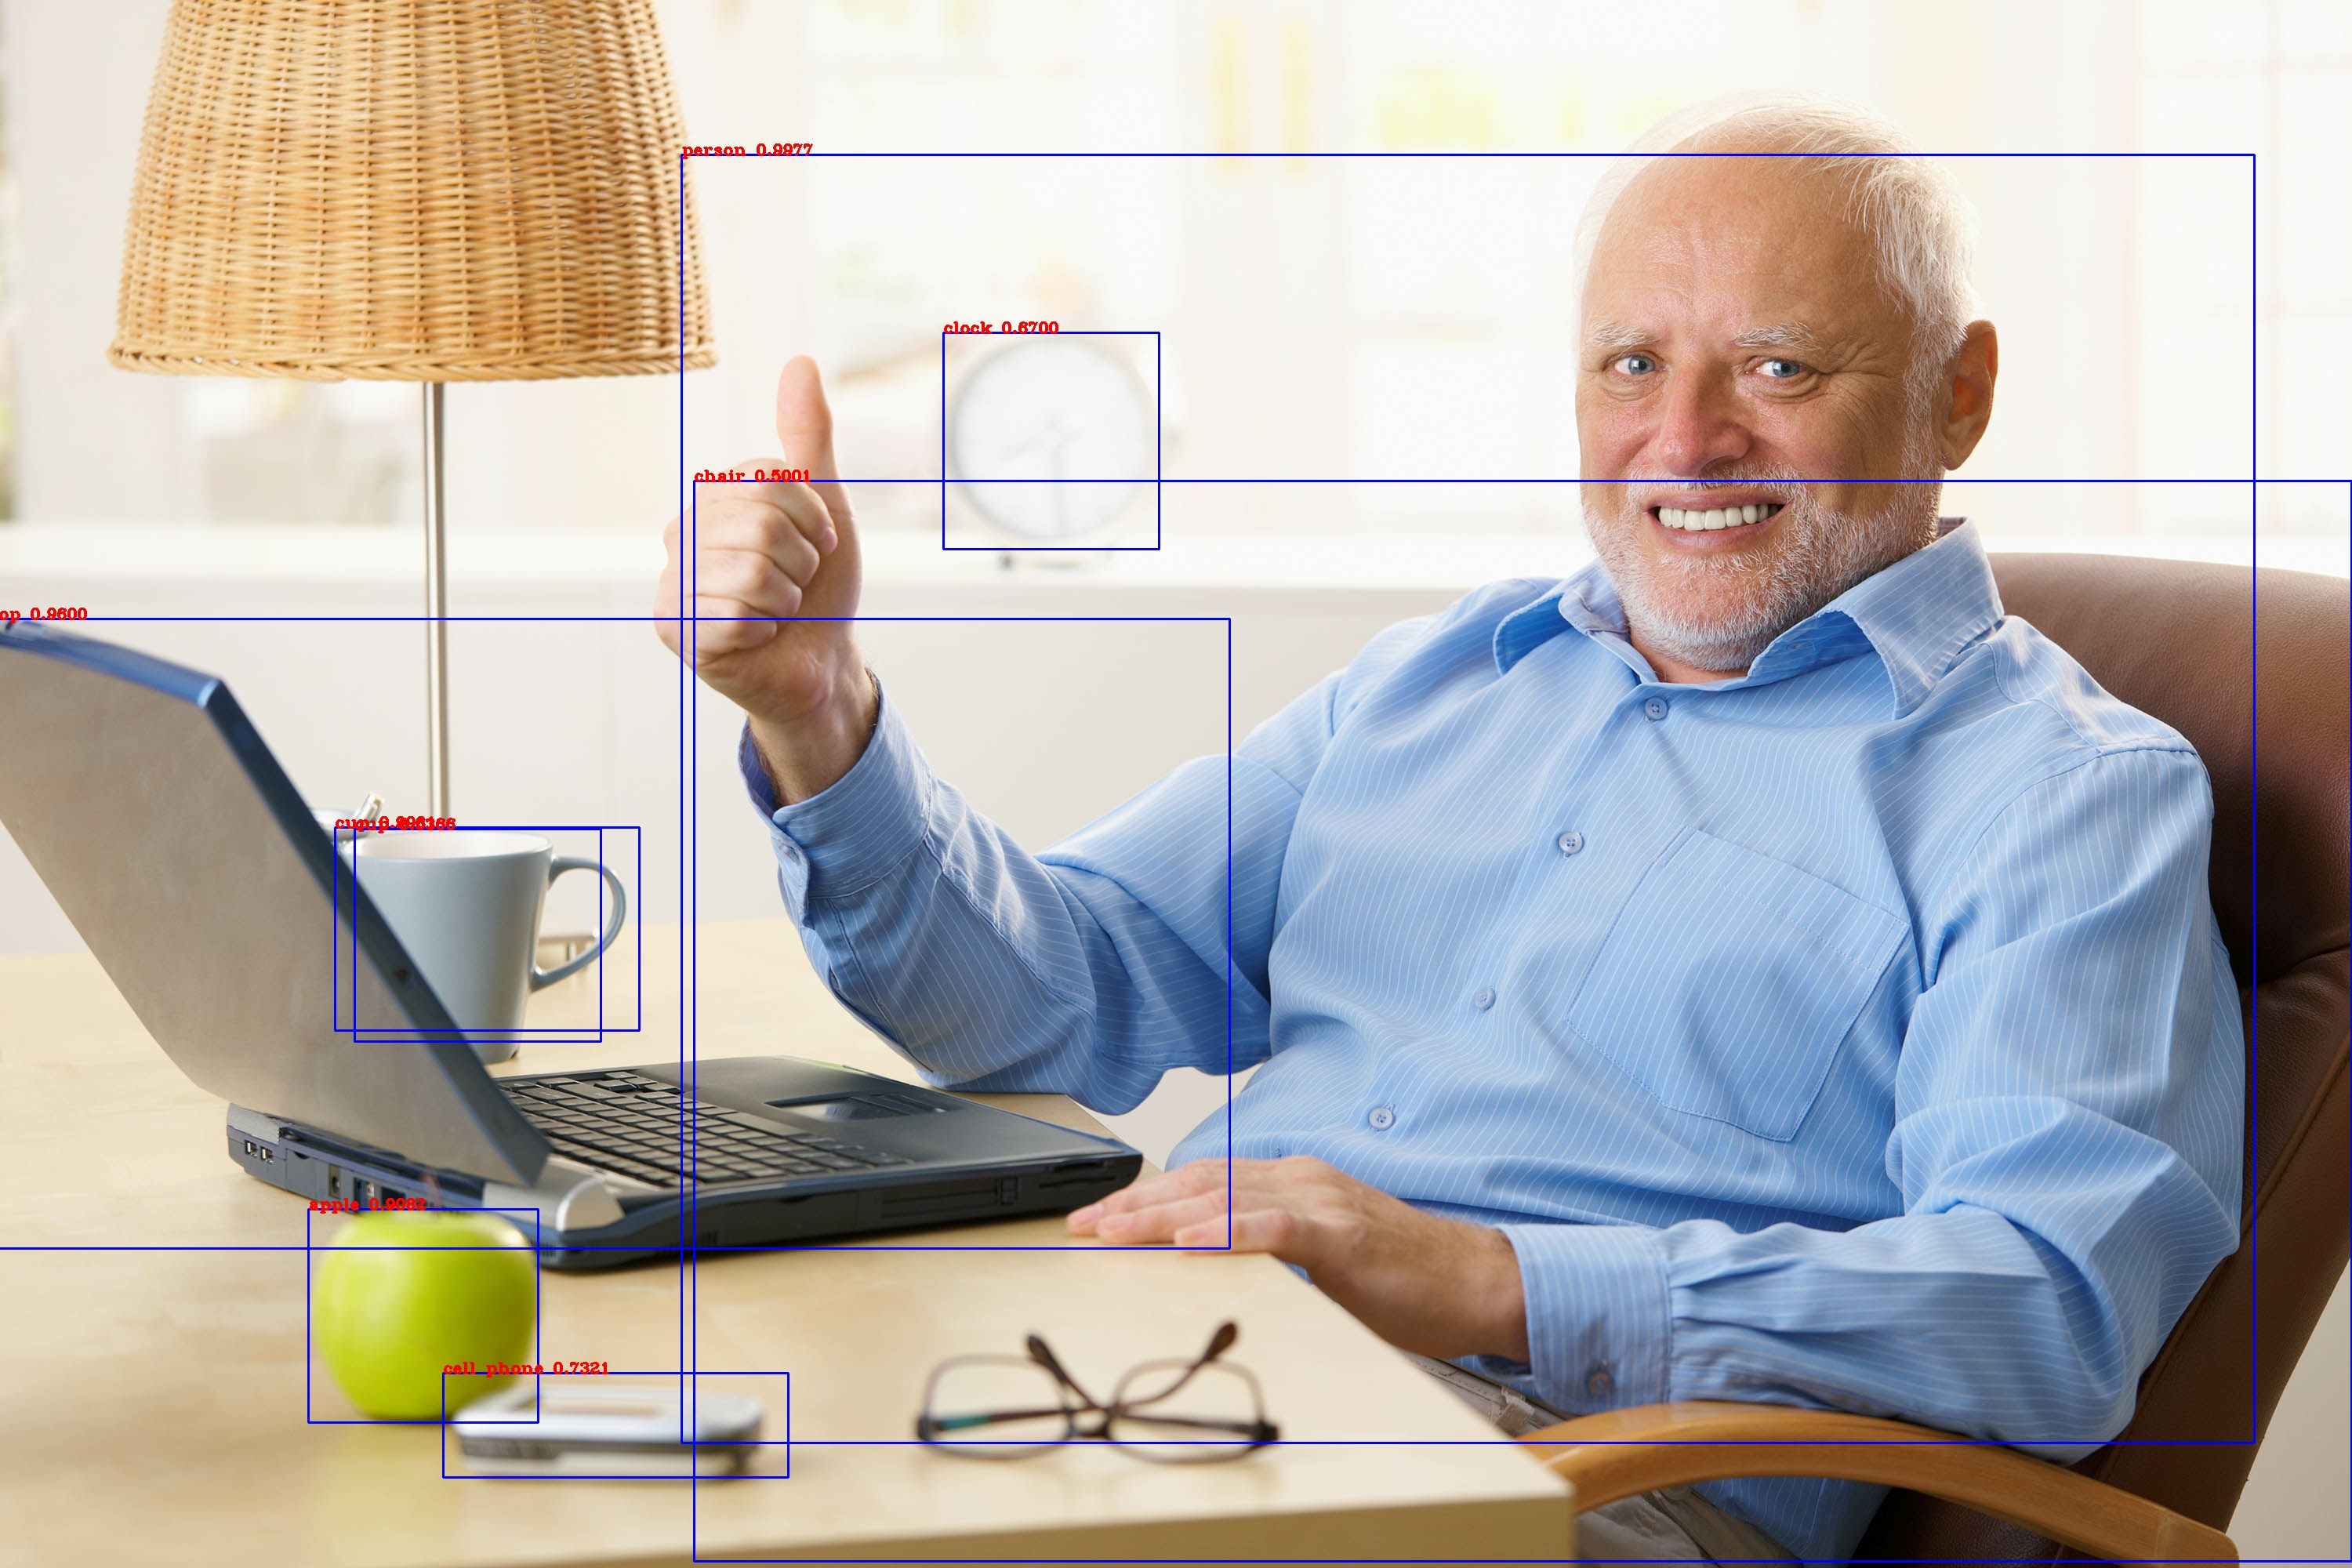

In [9]:
output = detector()
display(Image(data=bytes(cv2.imencode('.jpg', output)[1]), width=300))

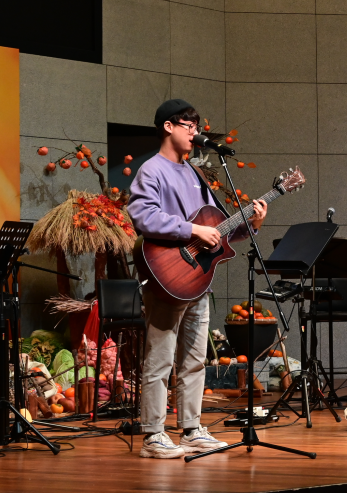

In [10]:
FLAGS.image = 'C:/Users/bitcamp/Desktop/HB/profile.png'
Image(filename=FLAGS.image, width=300)

time : 0.21950078010559082
person, 0.9652124047279358, [0.36250782 0.21026126 0.8934455  0.9373636 ]


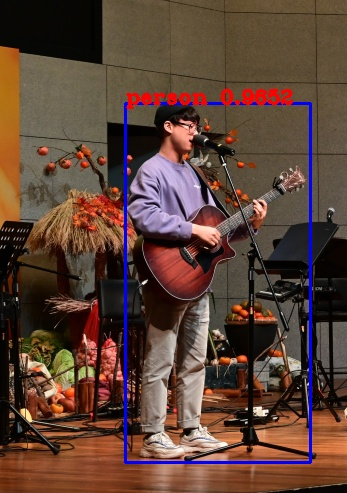

In [11]:
output = detector()
display(Image(data=bytes(cv2.imencode('.jpg', output)[1]), width=300))